<a href="https://colab.research.google.com/github/srao010/Reinforcement-Learning/blob/main/Thompson_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Ads_Optimisation.csv')

In [5]:
#IMPLEMENTING THOMPSON SAMPLING
df.shape

(10000, 10)

In [31]:
import random
N= len(df)
d= len(df.columns)
ads_selected= []
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
total_reward= 0

for n in range(N):
  ad= 0
  max_random_beta= 0
  for i in range(d):
    random_beta= random.betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1)
    if random_beta > max_random_beta:
      max_random_beta= random_beta
      ad= i
  ads_selected.append(ad)
  reward= df.iloc[n, ad]
  if reward == 1:
    number_of_rewards_1[ad] += 1
  else:
    number_of_rewards_0[ad] += 1
  total_reward += reward 

In [32]:
print(total_reward)

2615


Text(0, 0.5, 'Number of times each ad was selected by the algorithm')

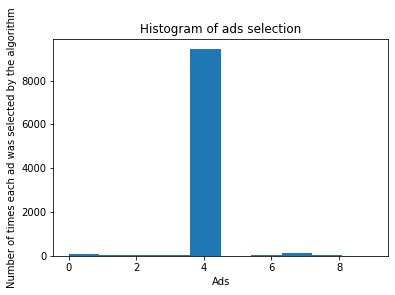

In [33]:
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected by the algorithm')